In [3]:
import pandas as pd
import math
import numpy as np

In [4]:
# std-dev
file_path = '../Factors/Factors.csv'
raw_data_df = pd.read_csv(file_path)
raw_data_df

,Date,Index,Adj_Close,Momentum_1m,Momentum_2m,Momentum_3m,Return,Turnover_1m,Turnover_2m,Turnover_3m,...,industry_Communication Services,industry_Consumer Cyclical,industry_Consumer Defensive,industry_Energy,industry_Financial Services,industry_Healthcare,industry_Industrials,industry_Real Estate,industry_Technology,industry_Utilities
0,2021-01-04,FTNT,29.112000,1.509253,0.423402,-0.062156,-0.019996,-0.285383,-0.086579,-0.048863,...,0,0,0,0,0,0,0,0,1,0
1,2021-01-05,FTNT,28.348000,0.732189,0.206508,-0.259777,-0.026243,-0.272697,-0.079926,-0.050330,...,0,0,0,0,0,0,0,0,1,0
2,2021-01-06,FTNT,27.622000,0.226557,-0.277413,-0.454297,-0.025610,-0.281239,-0.098481,-0.064920,...,0,0,0,0,0,0,0,0,1,0
3,2021-01-07,FTNT,28.650000,0.369790,-0.206709,-0.379767,0.037217,-0.265716,-0.107953,-0.069496,...,0,0,0,0,0,0,0,0,1,0
4,2021-01-08,FTNT,29.628000,0.600674,0.073511,-0.228582,0.034136,-0.271396,-0.115117,-0.079530,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207499,2022-07-25,SKYW,21.750000,-0.171436,-1.222563,-1.431199,0.008345,-0.052823,0.060735,0.230381,...,0,0,0,0,0,0,1,0,0,0
207500,2022-07-26,SKYW,21.170000,-0.780535,-1.052905,-1.362528,-0.026667,-0.134906,0.048236,0.207156,...,0,0,0,0,0,0,1,0,0,0
207501,2022-07-27,SKYW,22.139999,-0.258852,-0.881825,-1.278662,0.045820,-0.172973,0.011561,0.198016,...,0,0,0,0,0,0,1,0,0,0
207502,2022-07-28,SKYW,22.520000,-0.208851,-0.969848,-1.040081,0.017164,-0.181162,-0.012323,0.174423,...,0,0,0,0,0,0,1,0,0,0


In [5]:
raw_data_df.columns

Index(['Date', 'Index', 'Adj_Close', 'Momentum_1m', 'Momentum_2m',
       'Momentum_3m', 'Return', 'Turnover_1m', 'Turnover_2m', 'Turnover_3m',
       'Volatility_1m', 'Volatility_2m', 'Volatility_3m', 'std_1m', 'std_2m',
       'std_3m', 'ROA', 'ROE', 'EP', 'BP', 'industry_Basic Materials',
       'industry_Communication Services', 'industry_Consumer Cyclical',
       'industry_Consumer Defensive', 'industry_Energy',
       'industry_Financial Services', 'industry_Healthcare',
       'industry_Industrials', 'industry_Real Estate', 'industry_Technology',
       'industry_Utilities'],
      dtype='object')

In [6]:
factor_list = ['Momentum_1m', 'Momentum_2m', 'Momentum_3m',\
               'Turnover_1m', 'Turnover_2m', 'Turnover_3m',\
               'Volatility_1m', 'Volatility_2m', 'Volatility_3m',\
               'std_1m', 'std_2m', 'std_3m',\
               'ROA', 'ROE', 'EP', 'BP']

In [7]:
raw_data_df = raw_data_df[['Date'] + factor_list]

In [8]:
raw_data_df

,Date,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
0,2021-01-04,1.509253,0.423402,-0.062156,-0.285383,-0.086579,-0.048863,0.176756,-0.146931,-0.420400,-0.320949,-0.834235,-0.697958,1.035259,1.856977,0.161193,-1.168402
1,2021-01-05,0.732189,0.206508,-0.259777,-0.272697,-0.079926,-0.050330,0.093954,-0.156662,-0.408581,-0.273927,-0.773500,-0.676434,1.035259,1.856977,0.170715,-1.161258
2,2021-01-06,0.226557,-0.277413,-0.454297,-0.281239,-0.098481,-0.064920,0.027195,-0.151195,-0.445522,-0.284070,-0.764161,-0.683028,1.035259,1.856977,0.187499,-1.164596
3,2021-01-07,0.369790,-0.206709,-0.379767,-0.265716,-0.107953,-0.069496,-0.010949,-0.134435,-0.450369,-0.238771,-0.742466,-0.664139,1.035259,1.856977,0.178632,-1.169607
4,2021-01-08,0.600674,0.073511,-0.228582,-0.271396,-0.115117,-0.079530,-0.034240,-0.032219,-0.465816,-0.240308,-0.724945,-0.646162,1.035259,1.856977,0.167237,-1.163187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207499,2022-07-25,-0.171436,-1.222563,-1.431199,-0.052823,0.060735,0.230381,-0.727409,0.049023,0.222392,-0.244293,-0.043261,-0.322861,0.052198,-0.024654,0.800566,1.725905
207500,2022-07-26,-0.780535,-1.052905,-1.362528,-0.134906,0.048236,0.207156,-0.728702,0.047630,0.106397,-0.476548,-0.084905,-0.312029,0.052198,-0.024654,0.828811,1.727324
207501,2022-07-27,-0.258852,-0.881825,-1.278662,-0.172973,0.011561,0.198016,-0.762282,0.043165,0.104463,-0.389882,-0.049547,-0.289683,0.052198,-0.024654,0.781487,1.728432
207502,2022-07-28,-0.208851,-0.969848,-1.040081,-0.181162,-0.012323,0.174423,-0.848450,0.025245,0.097366,-0.393178,-0.095529,-0.313976,0.052198,-0.024654,0.774444,1.721744


In [9]:
std_df = raw_data_df.groupby(['Date']).std()

In [10]:
std_df

,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
Date,,,,,,,,,,,,,,,,
2021-01-04,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-05,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-08,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-07-26,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-07-27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
std_df.to_csv('/content/drive/MyDrive/DSA5205/Data/stddev.csv')

# T-test

In [ ]:
mean_df = pd.read_csv('/content/drive/MyDrive/DSA5205/Data/factors_returns.csv')
# stddev_df = pd.read_csv('/content/drive/MyDrive/DSA5205/Data/stddev.csv')

In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/DSA5205/Data/Factors.csv')

In [ ]:
len(raw_data.Index.unique())

524

In [ ]:
mean_df

,Date,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
0,2021-01-04,0.000564,-0.001213,0.002095,0.005353,0.004841,0.004130,0.006100,0.004234,0.004485,0.006452,0.005716,0.006356,-0.002815,-0.002048,-0.002131,0.002316
1,2021-01-05,0.010395,0.005779,0.004729,0.008857,0.007738,0.007887,0.009422,0.009386,0.008854,0.010878,0.010192,0.010502,-0.006650,-0.006043,-0.005651,-0.000553
2,2021-01-06,0.010880,0.016143,0.012818,-0.006084,-0.006062,-0.005632,-0.001621,0.000988,0.001524,-0.001697,0.000620,-0.000021,0.002159,0.001755,0.007800,0.007567
3,2021-01-07,0.009293,0.005213,0.005659,0.010260,0.009871,0.009233,0.014060,0.010274,0.011051,0.014695,0.011575,0.012238,-0.008464,-0.008162,-0.009732,-0.007138
4,2021-01-08,0.009260,0.001642,0.000958,0.005964,0.005321,0.005214,0.007493,0.005398,0.003166,0.006452,0.004647,0.005155,-0.005899,-0.005490,-0.007877,-0.005840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,0.004218,-0.000775,0.004333,-0.001341,-0.001979,-0.001966,-0.002456,-0.001047,-0.001916,-0.002957,-0.002948,-0.003140,0.003094,0.003969,0.005103,0.006301
392,2022-07-26,0.016112,0.008268,0.008436,-0.005193,-0.005577,-0.006246,-0.001525,-0.001808,-0.002266,-0.003370,-0.004316,-0.004603,-0.002186,-0.001361,0.000275,0.003594
393,2022-07-27,0.010963,0.009364,0.007029,0.006020,0.006864,0.007485,0.005385,0.004058,0.003508,0.007716,0.006520,0.006283,0.004485,0.004138,-0.000118,-0.005765
394,2022-07-28,0.017050,0.010609,0.013004,0.002872,0.003942,0.004373,0.003735,0.001409,0.000618,0.001929,0.001715,0.001991,0.005845,0.005732,0.001210,-0.006262


In [ ]:
stddev_df

,Date,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
0,2021-01-04,0.874493,0.720717,0.821515,1.021908,1.015006,1.005327,0.991957,0.920856,0.901560,1.003503,0.924282,0.913403,0.981526,0.994037,1.029939,1.029018
1,2021-01-05,0.882473,0.746130,0.846405,1.024503,1.015128,1.004378,0.995715,0.938854,0.906195,1.005331,0.937518,0.916782,0.981526,0.994037,1.024434,1.026316
2,2021-01-06,0.880143,0.767094,0.826642,1.022905,1.014578,1.003884,0.957252,0.942778,0.898700,0.956157,0.940850,0.908968,0.981526,0.994037,1.011204,1.020763
3,2021-01-07,0.848287,0.749959,0.823651,1.022205,1.014923,1.003967,0.947861,0.936774,0.893607,0.954693,0.941223,0.905066,0.981526,0.994037,1.005233,1.019503
4,2021-01-08,0.837062,0.709587,0.805259,1.025545,1.014625,1.005706,0.938485,0.942688,0.891045,0.958138,0.939843,0.903614,0.981526,0.994037,1.007424,1.023196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,0.858672,0.871552,0.835289,1.016752,1.020163,1.019808,0.949334,0.972969,0.998961,0.966239,0.991827,0.993622,1.006437,1.000251,1.058625,1.001052
392,2022-07-26,0.910509,0.876838,0.822809,1.016126,1.021240,1.020512,0.952619,0.975285,0.997190,0.989001,0.986686,0.993580,1.006437,1.000251,1.059648,1.001006
393,2022-07-27,0.879596,0.893671,0.874561,1.018422,1.022911,1.020328,0.945922,0.971178,0.998168,0.996490,0.984618,0.997584,1.006437,1.000251,1.056490,0.999513
394,2022-07-28,0.899115,0.897824,0.899587,1.021223,1.025061,1.021365,0.945044,0.962057,0.995717,0.994526,0.983231,0.997466,1.006437,1.000251,1.055646,1.000149


In [ ]:
def t_test(mean_df, stddev_df, factor, n_sample):
  mean_data = mean_df[['Date', factor]]
  stddev_data = stddev_df[['Date', factor]]
  res_df = mean_data.merge(stddev_data, on=['Date'], suffixes=['_mean', '_stddev'])
  mu = 0
  res_df['numerator'] = res_df[[f'{factor}_mean']] - mu
  res_df['dominator'] = res_df[[f'{factor}_stddev']] / math.sqrt(n_sample - 1)
  res_df[f'{factor}_ttest'] = res_df['numerator'] / res_df['dominator']
  return res_df[['Date', f'{factor}_ttest']]

In [ ]:
n_sample = len(raw_data.Index.unique())
ttest_df = pd.DataFrame(data=mean_df[['Date']], columns=['Date'])
for factor in factor_list:
  tmp_df = t_test(mean_df, stddev_df, factor, n_sample)
  ttest_df = ttest_df.merge(tmp_df, on=['Date'], how='outer')

In [ ]:
ttest_df

,Date,Momentum_1m_ttest,Momentum_2m_ttest,Momentum_3m_ttest,Turnover_1m_ttest,Turnover_2m_ttest,Turnover_3m_ttest,Volatility_1m_ttest,Volatility_2m_ttest,Volatility_3m_ttest,std_1m_ttest,std_2m_ttest,std_3m_ttest,ROA_ttest,ROE_ttest,EP_ttest,BP_ttest
0,2021-01-04,0.014755,-0.038474,0.058323,0.119805,0.109063,0.093945,0.140628,0.105153,0.113762,0.147036,0.141433,0.159128,-0.065584,-0.047107,-0.047323,0.051475
1,2021-01-05,0.269373,0.177121,0.127772,0.197712,0.174334,0.179576,0.216401,0.228619,0.223433,0.247443,0.248627,0.261975,-0.154950,-0.139016,-0.126160,-0.012316
2,2021-01-06,0.282690,0.481270,0.354600,-0.136030,-0.136631,-0.128307,-0.038721,0.023972,0.038770,-0.040588,0.015061,-0.000539,0.050297,0.040371,0.176409,0.169532
3,2021-01-07,0.250543,0.158952,0.157133,0.229543,0.222423,0.210310,0.339235,0.250826,0.282829,0.352022,0.281246,0.309233,-0.197202,-0.187780,-0.221413,-0.160115
4,2021-01-08,0.252992,0.052917,0.027212,0.133002,0.119944,0.118556,0.182582,0.130963,0.081247,0.154010,0.113086,0.130470,-0.137444,-0.126296,-0.178804,-0.130519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,0.112333,-0.020335,0.118644,-0.030162,-0.044371,-0.044080,-0.059168,-0.024620,-0.043858,-0.069977,-0.067983,-0.072260,0.070305,0.090744,0.110244,0.143951
392,2022-07-26,0.404696,0.215641,0.234476,-0.116880,-0.124885,-0.139972,-0.036608,-0.042390,-0.051972,-0.077936,-0.100028,-0.105944,-0.049678,-0.031111,0.005941,0.082114
393,2022-07-27,0.285025,0.239633,0.183804,0.135192,0.153468,0.167774,0.130188,0.095546,0.080370,0.177079,0.151446,0.144030,0.101924,0.094619,-0.002552,-0.131910
394,2022-07-28,0.433682,0.270232,0.330584,0.064313,0.087945,0.097905,0.090387,0.033485,0.014187,0.044364,0.039900,0.045638,0.132827,0.131042,0.026208,-0.143181


In [ ]:
ttest_df.to_csv('/content/drive/MyDrive/DSA5205/Data/ttest.csv', index=False)

In [ ]:
ttest_df

,Date,Momentum_1m_ttest,Momentum_2m_ttest,Momentum_3m_ttest,Turnover_1m_ttest,Turnover_2m_ttest,Turnover_3m_ttest,Volatility_1m_ttest,Volatility_2m_ttest,Volatility_3m_ttest,std_1m_ttest,std_2m_ttest,std_3m_ttest,ROA_ttest,ROE_ttest,EP_ttest,BP_ttest
0,2021-01-04,0.014755,-0.038474,0.058323,0.119805,0.109063,0.093945,0.140628,0.105153,0.113762,0.147036,0.141433,0.159128,-0.065584,-0.047107,-0.047323,0.051475
1,2021-01-05,0.269373,0.177121,0.127772,0.197712,0.174334,0.179576,0.216401,0.228619,0.223433,0.247443,0.248627,0.261975,-0.154950,-0.139016,-0.126160,-0.012316
2,2021-01-06,0.282690,0.481270,0.354600,-0.136030,-0.136631,-0.128307,-0.038721,0.023972,0.038770,-0.040588,0.015061,-0.000539,0.050297,0.040371,0.176409,0.169532
3,2021-01-07,0.250543,0.158952,0.157133,0.229543,0.222423,0.210310,0.339235,0.250826,0.282829,0.352022,0.281246,0.309233,-0.197202,-0.187780,-0.221413,-0.160115
4,2021-01-08,0.252992,0.052917,0.027212,0.133002,0.119944,0.118556,0.182582,0.130963,0.081247,0.154010,0.113086,0.130470,-0.137444,-0.126296,-0.178804,-0.130519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,0.112333,-0.020335,0.118644,-0.030162,-0.044371,-0.044080,-0.059168,-0.024620,-0.043858,-0.069977,-0.067983,-0.072260,0.070305,0.090744,0.110244,0.143951
392,2022-07-26,0.404696,0.215641,0.234476,-0.116880,-0.124885,-0.139972,-0.036608,-0.042390,-0.051972,-0.077936,-0.100028,-0.105944,-0.049678,-0.031111,0.005941,0.082114
393,2022-07-27,0.285025,0.239633,0.183804,0.135192,0.153468,0.167774,0.130188,0.095546,0.080370,0.177079,0.151446,0.144030,0.101924,0.094619,-0.002552,-0.131910
394,2022-07-28,0.433682,0.270232,0.330584,0.064313,0.087945,0.097905,0.090387,0.033485,0.014187,0.044364,0.039900,0.045638,0.132827,0.131042,0.026208,-0.143181


In [ ]:
import scipy.stats

In [ ]:
n_sample

524

In [ ]:
t_values = pd.DataFrame(columns=['factor', 't_value'])
for factor in factor_list:
  factor_tvalue = ttest_df[f'{factor}_ttest'].abs().mean()
  print('t value: ', factor_tvalue)
  print('p value: ', scipy.stats.t.sf(factor_tvalue, df=n_sample))

t value:  0.19838413558039195
p value:  0.4214107357078661
t value:  0.16762821779663087
p value:  0.4334702218812975
t value:  0.1655218996654855
p value:  0.4342985266750584
t value:  0.12674115179159076
p value:  0.44959694584854715
t value:  0.1293411113459339
p value:  0.44856868672769873
t value:  0.13064329070714492
p value:  0.4480538170085786
t value:  0.15514057585504565
p value:  0.4383851176656918
t value:  0.15146115534634783
p value:  0.4398351217119031
t value:  0.15061440070599738
p value:  0.44016893024902676
t value:  0.17642153536192812
p value:  0.43001547496208525
t value:  0.17228566643182425
p value:  0.431639736002702
t value:  0.17057267514299834
p value:  0.4323128125425558
t value:  0.09886655774306788
p value:  0.46064101543307356
t value:  0.09746788391304828
p value:  0.46119605340911907
t value:  0.11093077049667631
p value:  0.4558568600346869
t value:  0.09671581429039325
p value:  0.4614945298131619


# T-test Analysis -> |t| > 2

In [11]:
t_value_df = pd.read_csv('../Analysis/t_values.csv')
t_value_df

,Date,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
0,2021-01-04,0.713073,1.948247,2.947718,3.850930,3.393231,3.014160,3.720567,3.169914,3.128471,4.041968,3.870546,3.981816,-1.757862,-1.392781,-1.476117,1.355841
1,2021-01-05,5.952172,5.046667,3.909445,5.218191,4.608248,4.575239,5.350599,5.283892,4.696630,6.384262,5.754300,5.756744,-3.583612,-3.418902,-3.243759,-0.420629
2,2021-01-06,3.970591,5.365894,4.813302,-3.171169,-2.984026,-2.692331,-0.905237,-0.504036,0.096741,-1.087695,-0.493446,-0.446852,1.387592,1.104056,3.450414,2.957760
3,2021-01-07,5.684422,4.741424,4.483287,5.983275,5.461684,4.974356,7.267159,6.228790,6.006065,7.779365,6.310969,6.132261,-4.422485,-4.329682,-4.603441,-3.541006
4,2021-01-08,4.485618,1.982818,1.747346,2.931904,2.671733,2.688529,3.760303,2.755931,1.897122,3.320592,2.502047,2.468780,-3.001551,-2.920855,-3.650618,-2.196109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,2.445429,-0.594387,3.112267,-1.427208,-1.761317,-1.519616,-2.222833,-0.940909,-1.830977,-2.796558,-3.170056,-3.528425,3.074267,3.647226,4.637233,5.324350
392,2022-07-26,9.857932,4.766397,4.517594,-3.027343,-3.875635,-4.320406,-0.751722,-0.856955,-0.861648,-1.655640,-2.205137,-2.173943,-1.455188,-0.978269,0.516160,2.061618
393,2022-07-27,4.486022,3.777974,3.033963,3.130383,3.790351,3.857240,1.997826,1.393695,1.037054,3.115820,1.972257,1.946973,2.097349,1.969937,0.323652,-2.537326
394,2022-07-28,9.944278,5.502992,6.784996,1.794612,2.206167,2.413763,2.224173,0.508987,0.176845,0.951911,0.492000,0.422305,3.397448,3.513162,1.011819,-3.438190


In [12]:
factor_list = list(t_value_df.columns)
factor_list.remove('Date')
factor_list

['Momentum_1m',
 'Momentum_2m',
 'Momentum_3m',
 'Turnover_1m',
 'Turnover_2m',
 'Turnover_3m',
 'Volatility_1m',
 'Volatility_2m',
 'Volatility_3m',
 'std_1m',
 'std_2m',
 'std_3m',
 'ROA',
 'ROE',
 'EP',
 'BP']

In [13]:
t_abs_df = t_value_df[factor_list].abs()
t_abs_df

,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
0,0.713073,1.948247,2.947718,3.850930,3.393231,3.014160,3.720567,3.169914,3.128471,4.041968,3.870546,3.981816,1.757862,1.392781,1.476117,1.355841
1,5.952172,5.046667,3.909445,5.218191,4.608248,4.575239,5.350599,5.283892,4.696630,6.384262,5.754300,5.756744,3.583612,3.418902,3.243759,0.420629
2,3.970591,5.365894,4.813302,3.171169,2.984026,2.692331,0.905237,0.504036,0.096741,1.087695,0.493446,0.446852,1.387592,1.104056,3.450414,2.957760
3,5.684422,4.741424,4.483287,5.983275,5.461684,4.974356,7.267159,6.228790,6.006065,7.779365,6.310969,6.132261,4.422485,4.329682,4.603441,3.541006
4,4.485618,1.982818,1.747346,2.931904,2.671733,2.688529,3.760303,2.755931,1.897122,3.320592,2.502047,2.468780,3.001551,2.920855,3.650618,2.196109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2.445429,0.594387,3.112267,1.427208,1.761317,1.519616,2.222833,0.940909,1.830977,2.796558,3.170056,3.528425,3.074267,3.647226,4.637233,5.324350
392,9.857932,4.766397,4.517594,3.027343,3.875635,4.320406,0.751722,0.856955,0.861648,1.655640,2.205137,2.173943,1.455188,0.978269,0.516160,2.061618
393,4.486022,3.777974,3.033963,3.130383,3.790351,3.857240,1.997826,1.393695,1.037054,3.115820,1.972257,1.946973,2.097349,1.969937,0.323652,2.537326
394,9.944278,5.502992,6.784996,1.794612,2.206167,2.413763,2.224173,0.508987,0.176845,0.951911,0.492000,0.422305,3.397448,3.513162,1.011819,3.438190


In [14]:
greater_df = pd.DataFrame(columns=['factor', 'greater2', 'ratiogreater2'])
for factor in factor_list:
  number = int(t_abs_df[[factor]][t_abs_df[factor] > 2].count())
  ratio = float(t_abs_df[[factor]][t_abs_df[factor] > 2].count() / len(t_abs_df))
  tmp_df = pd.DataFrame([[factor, number, ratio]], columns=['factor','greater2','ratiogreater2'])
  greater_df = pd.concat([greater_df, tmp_df], ignore_index=True)

In [15]:
greater_df

,factor,greater2,ratiogreater2
0,Momentum_1m,321,0.810606
1,Momentum_2m,291,0.734848
2,Momentum_3m,285,0.719697
3,Turnover_1m,273,0.689394
4,Turnover_2m,273,0.689394
5,Turnover_3m,279,0.704545
6,Volatility_1m,287,0.724747
7,Volatility_2m,280,0.707071
8,Volatility_3m,277,0.699495
9,std_1m,288,0.727273


In [28]:
greater_df.to_csv('/content/drive/MyDrive/DSA5205/Data/greater2.csv', index=False)

# T-test Analysis -> p value distribution

In [16]:
p_value = pd.read_csv('../Analysis/p_values.csv')
p_value

,Date,Momentum_1m,Momentum_2m,Momentum_3m,Turnover_1m,Turnover_2m,Turnover_3m,Volatility_1m,Volatility_2m,Volatility_3m,std_1m,std_2m,std_3m,ROA,ROE,EP,BP
0,2021-01-04,4.761185e-01,5.191990e-02,3.344270e-03,1.322557e-04,7.430936e-04,2.701930e-03,2.202922e-04,1.614141e-03,1.855130e-03,6.097287e-05,1.223257e-04,7.807264e-05,0.079356,0.164278,0.140514,1.757348e-01
1,2021-01-05,4.853288e-09,6.214723e-07,1.046815e-04,2.609448e-07,5.108116e-06,5.946949e-06,1.313455e-07,1.859504e-07,3.384412e-06,3.803353e-10,1.482953e-08,1.462914e-08,0.000371,0.000678,0.001255,6.741989e-01
2,2021-01-06,8.173055e-05,1.212197e-07,1.945812e-06,1.607313e-03,2.977780e-03,7.322926e-03,3.657568e-01,6.144484e-01,9.229689e-01,2.772310e-01,6.219044e-01,6.551670e-01,0.165852,0.270076,0.000605,3.238995e-03
3,2021-01-07,2.183696e-08,2.740203e-06,9.039032e-06,4.060277e-09,7.302641e-08,8.894570e-07,1.343641e-12,9.668547e-10,3.561023e-09,3.913708e-14,5.918297e-10,1.709351e-09,0.000012,0.000018,0.000005,4.341988e-04
4,2021-01-08,8.944399e-06,4.791052e-02,8.116424e-02,3.516419e-03,7.781360e-03,7.405675e-03,1.888584e-04,6.056768e-03,5.836249e-02,9.609687e-04,1.265202e-02,1.387602e-02,0.002814,0.003641,0.000288,2.852245e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-07-25,1.479668e-02,5.525103e-01,1.958059e-03,1.541167e-01,7.876900e-02,1.292118e-01,2.665381e-02,3.471861e-01,6.767278e-02,5.355122e-03,1.613369e-03,4.548613e-04,0.002220,0.000292,0.000004,1.506660e-07
392,2022-07-26,3.851454e-21,2.434108e-06,7.738332e-06,2.588780e-03,1.198670e-04,1.864367e-05,4.525565e-01,3.918622e-01,3.892759e-01,9.839461e-02,2.787891e-02,3.015717e-02,0.146217,0.328394,0.605961,3.973766e-02
393,2022-07-27,8.928076e-06,1.762836e-04,2.533618e-03,1.843317e-03,1.679500e-04,1.289811e-04,4.625290e-02,1.640017e-01,3.001898e-01,1.935046e-03,4.910664e-02,5.207284e-02,0.036442,0.049373,0.746331,1.145962e-02
394,2022-07-28,1.861361e-21,5.855538e-08,3.152665e-11,7.329284e-02,2.780627e-02,1.613127e-02,2.656300e-02,6.109758e-01,8.596988e-01,3.415819e-01,6.229259e-01,6.729757e-01,0.000732,0.000481,0.312092,6.323027e-04


In [17]:
import numpy as np
import matplotlib.pyplot as plt

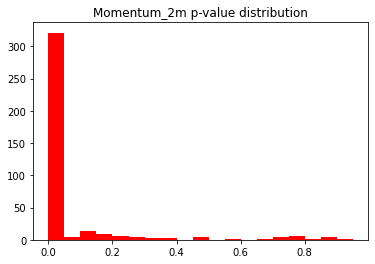

In [34]:
def plot_factor(factor):
  x = p_value['Momentum_1m']
  bin = list(np.arange(0, 1, 0.05))
  plt.hist(x, bins=bin, color="red")
  plt.title(f'{factor} p-value distribution')
  plt.show()
plot_factor('Momentum_2m')

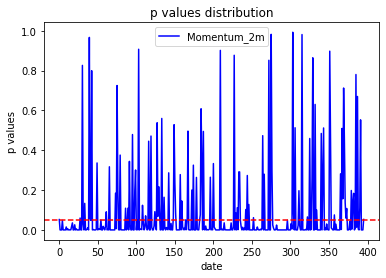

In [57]:
x = np.arange(396)
x1 = range(396)
y1 = list(p_value['Momentum_2m'])
plt.plot(x1, y1, 'b-', label='Momentum_2m')
plt.axhline(0.05, c='r', ls='--')
plt.title('p values distribution')
plt.xlabel('date')
plt.ylabel('p values')
plt.legend()
plt.show()